In [1]:
import xarray as xr
import cartopy.crs as ccrs

In [2]:
fin1 = xr.open_dataset('/Users/CDKoven/Downloads/CLM5_current_surf_deg025.nc')
fin2 = xr.open_dataset('/Users/CDKoven/Downloads/CLM5_current_luhpasture_deg025.nc')
fin3 = xr.open_dataset('/Users/CDKoven/Downloads/CLM5_current_luhother_deg025.nc')
fin4 = xr.open_dataset('/Users/CDKoven/Downloads/CLM5_current_luhforest_deg025.nc')

fin1['lon'] = fin1.lon * 0.25 - 180. + 1./8.
fin1['lat'] = fin1.lat * 0.25 - 90. + 1./8.

fin2['lon'] = fin2.lon * 0.25 - 180. + 1./8.
fin2['lat'] = fin2.lat * 0.25 - 90. + 1./8.

fin3['lon'] = fin3.lon * 0.25 - 180. + 1./8.
fin3['lat'] = fin3.lat * 0.25 - 90. + 1./8.

fin4['lon'] = fin4.lon * 0.25 - 180. + 1./8.
fin4['lat'] = fin4.lat * 0.25 - 90. + 1./8.

In [3]:
fin1['PCT_NAT_PFT'] = fin1['PCT_NAT_PFT'].assign_attrs({'long_name':'PFT percentage, CLM5_current_surf_deg025.nc'})

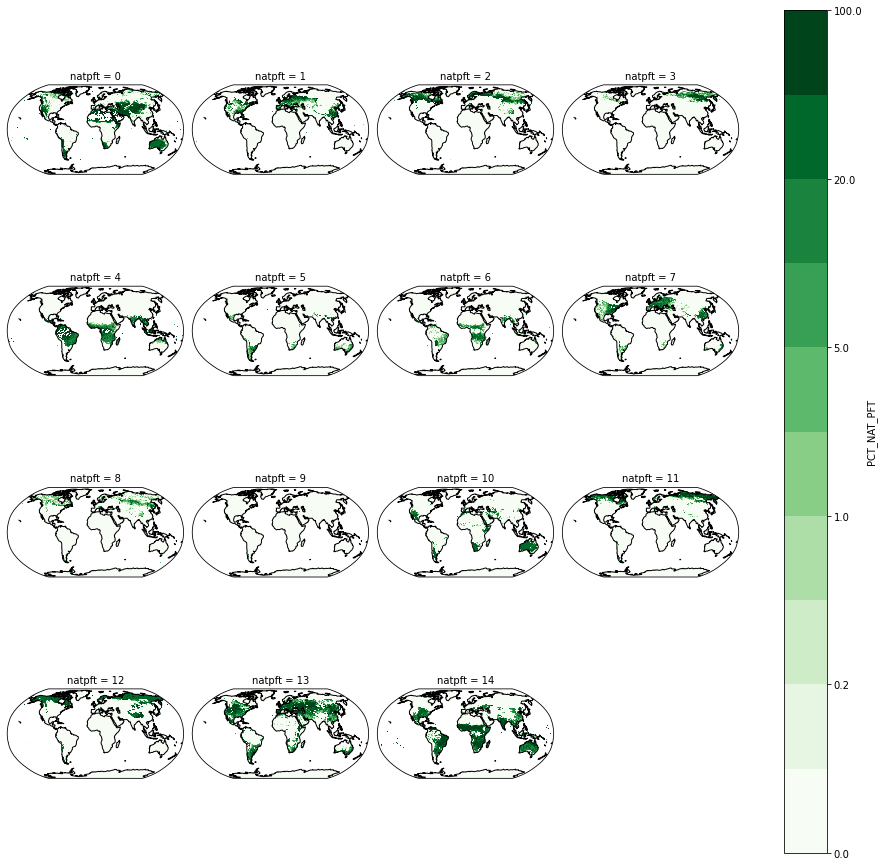

In [4]:
fg = (fin1.PCT_NAT_PFT*fin1.PCT_NAT_PFT.sum(dim='natpft')/fin1.PCT_NAT_PFT.sum(dim='natpft')).plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap='Greens', levels=[0.,0.1,0.2,0.5,1.,2.,5.,10.,20.,50.,100], transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()))

for ax in fg.axes.flat:
    ax.coastlines()

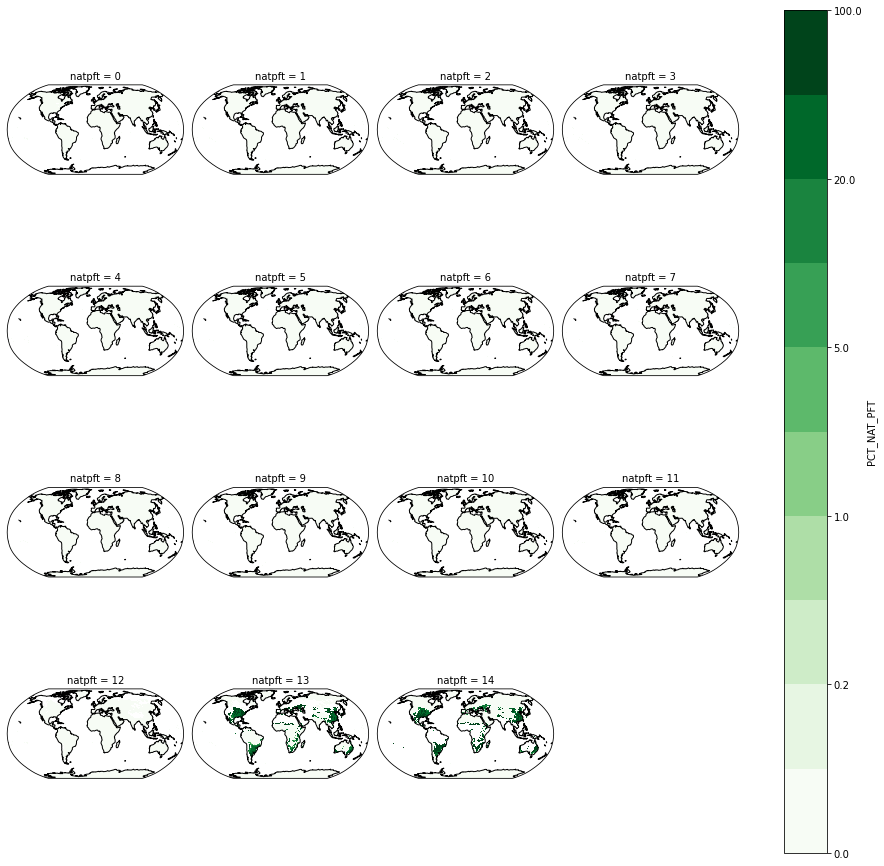

In [5]:
#(fin2.PCT_NAT_PFT*fin2.PCT_NAT_PFT.sum(dim='natpft')/fin2.PCT_NAT_PFT.sum(dim='natpft')).plot(x='lon',y='lat',col='natpft', col_wrap=4)

fg = (fin2.PCT_NAT_PFT*fin2.PCT_NAT_PFT.sum(dim='natpft')/fin2.PCT_NAT_PFT.sum(dim='natpft')).plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap='Greens', levels=[0.,0.1,0.2,0.5,1.,2.,5.,10.,20.,50.,100], transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()))

for ax in fg.axes.flat:
    ax.coastlines()

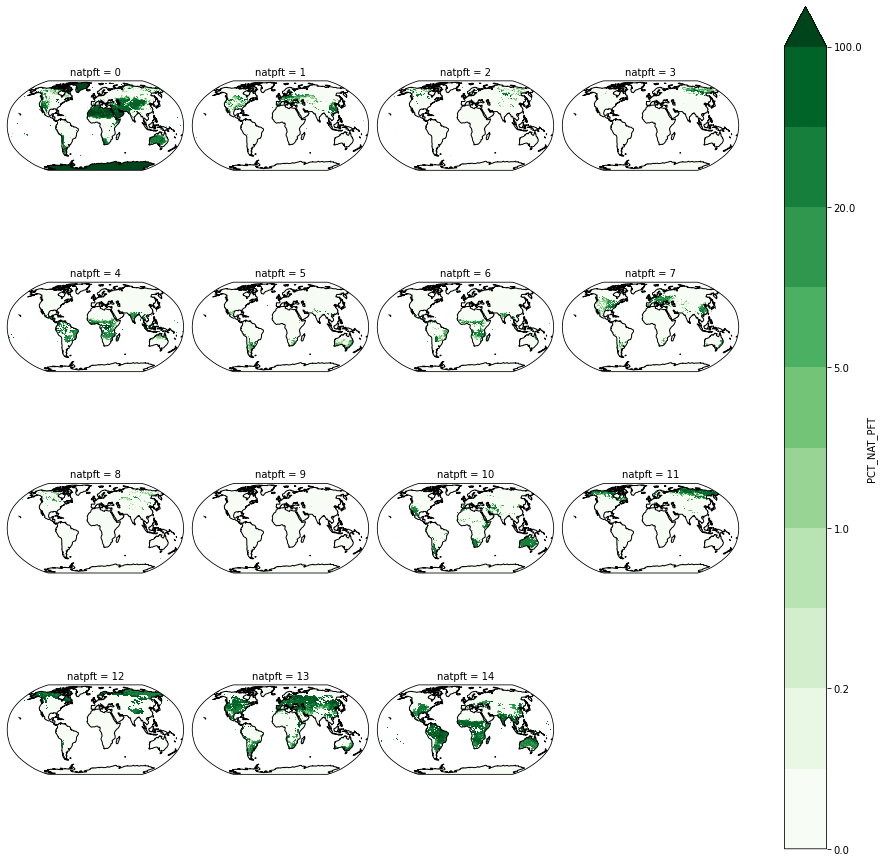

In [6]:
#(fin3.PCT_NAT_PFT*fin3.PCT_NAT_PFT.sum(dim='natpft')/fin3.PCT_NAT_PFT.sum(dim='natpft')).plot(x='lon',y='lat',col='natpft', col_wrap=4)


fg = (fin3.PCT_NAT_PFT*fin3.PCT_NAT_PFT.sum(dim='natpft')/fin3.PCT_NAT_PFT.sum(dim='natpft')).plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap='Greens', levels=[0.,0.1,0.2,0.5,1.,2.,5.,10.,20.,50.,100], transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()))

for ax in fg.axes.flat:
    ax.coastlines()
    

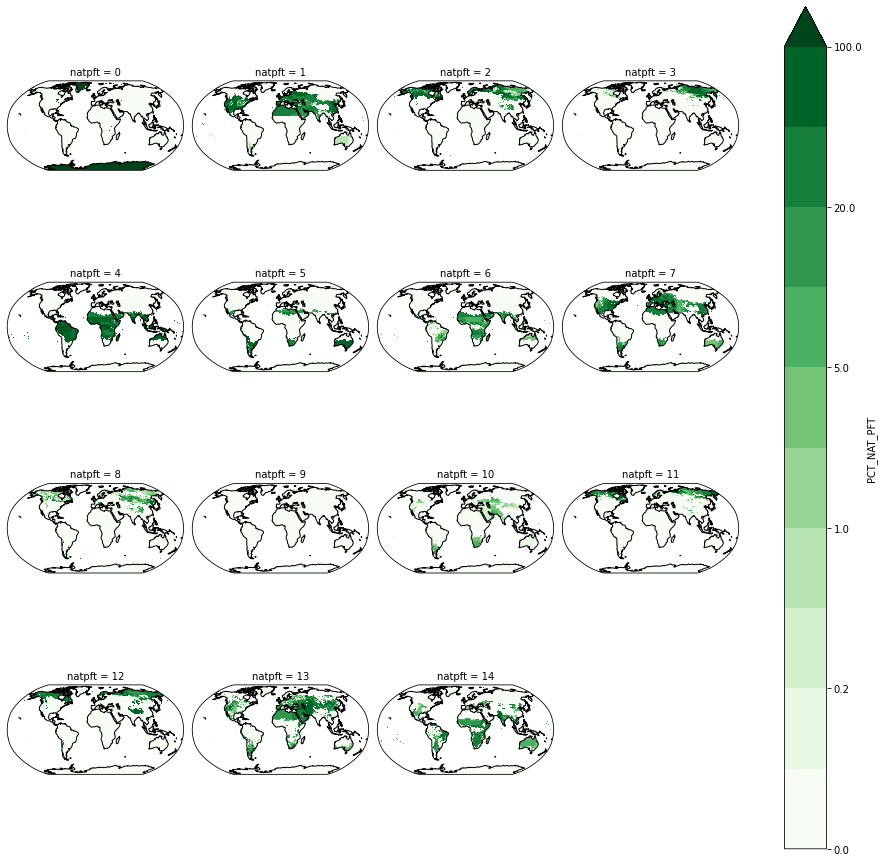

In [7]:
#(fin4.PCT_NAT_PFT*fin4.PCT_NAT_PFT.sum(dim='natpft')/fin4.PCT_NAT_PFT.sum(dim='natpft')).plot(x='lon',y='lat',col='natpft', col_wrap=4)


fg = (fin4.PCT_NAT_PFT*fin4.PCT_NAT_PFT.sum(dim='natpft')/fin4.PCT_NAT_PFT.sum(dim='natpft')).plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap='Greens', levels=[0.,0.1,0.2,0.5,1.,2.,5.,10.,20.,50.,100], transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()))

for ax in fg.axes.flat:
    ax.coastlines()

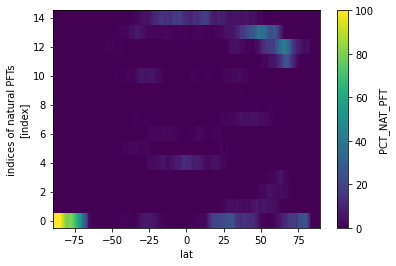

In [9]:
fin3.PCT_NAT_PFT.mean(dim='lon').plot()

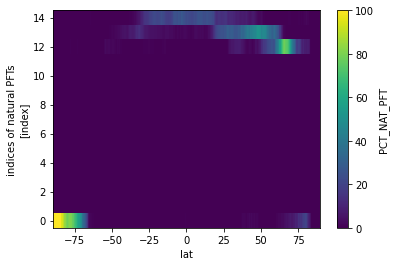

In [10]:
fin2.PCT_NAT_PFT.mean(dim='lon').plot()

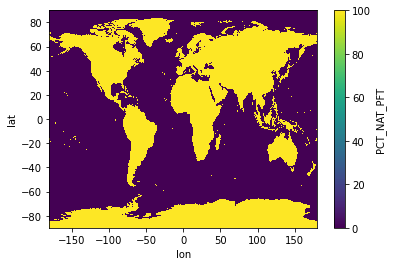

In [12]:
fin1.PCT_NAT_PFT.sum(dim='natpft').plot()